In [7]:
# !pip install --upgrade pip

In [8]:
# !pip install yfinance

In [9]:
# import libraries

import numpy as np 
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import StandardScaler # use it because kmean is sentsitive for the wide range of features, then we apply it for normalization

import matplotlib.pyplot as plt 
%matplotlib inline

In [10]:
start = "2010-01-01"
end = "2023-12-31"

In [11]:
arkk_df = yf.download("ARKK", start = start, end = end, progress = False) # raw data
arkk_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-31,20.420000,20.420000,20.379999,20.379999,18.391508,2700
2014-11-03,20.490000,20.490000,20.350000,20.379999,18.391508,2300
2014-11-04,20.200001,20.270000,20.200001,20.260000,18.283218,7900
2014-11-05,20.510000,20.510000,20.000000,20.000000,18.048588,14900
2014-11-06,20.090000,20.139999,20.070000,20.139999,18.174925,2000


In [12]:
arkk_df.shape

(2306, 6)

In [13]:
arkk_df.index

DatetimeIndex(['2014-10-31', '2014-11-03', '2014-11-04', '2014-11-05',
               '2014-11-06', '2014-11-07', '2014-11-10', '2014-11-11',
               '2014-11-12', '2014-11-13',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2306, freq=None)

In [14]:
type(arkk_df)

pandas.core.frame.DataFrame

In [15]:
stock = arkk_df.copy()
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-31,20.420000,20.420000,20.379999,20.379999,18.391508,2700
2014-11-03,20.490000,20.490000,20.350000,20.379999,18.391508,2300
2014-11-04,20.200001,20.270000,20.200001,20.260000,18.283218,7900
2014-11-05,20.510000,20.510000,20.000000,20.000000,18.048588,14900
2014-11-06,20.090000,20.139999,20.070000,20.139999,18.174925,2000


In [16]:
stock.shape

(2306, 6)

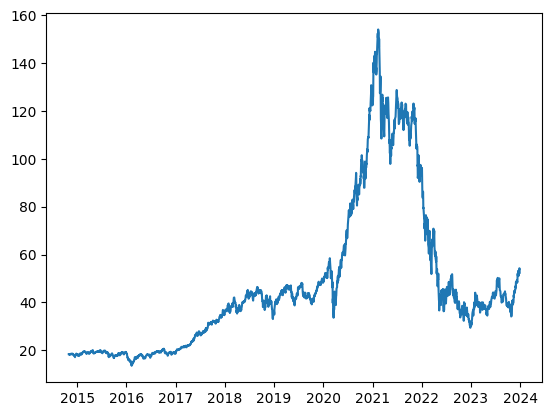

In [17]:
# plot 

plt.plot(stock['Adj Close'])

In [18]:
# get feature for clustering

# calculate log return
stock['Log Rets'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2014-10-31,20.420000,20.420000,20.379999,20.379999,18.391508,2700,NaN
2014-11-03,20.490000,20.490000,20.350000,20.379999,18.391508,2300,0.000000
2014-11-04,20.200001,20.270000,20.200001,20.260000,18.283218,7900,-0.005905
2014-11-05,20.510000,20.510000,20.000000,20.000000,18.048588,14900,-0.012916
2014-11-06,20.090000,20.139999,20.070000,20.139999,18.174925,2000,0.006975


In [19]:
stock.shape

(2306, 7)

In [20]:
stock.dropna(inplace = True)

In [21]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2014-11-03,20.490000,20.490000,20.350000,20.379999,18.391508,2300,0.000000
2014-11-04,20.200001,20.270000,20.200001,20.260000,18.283218,7900,-0.005905
2014-11-05,20.510000,20.510000,20.000000,20.000000,18.048588,14900,-0.012916
2014-11-06,20.090000,20.139999,20.070000,20.139999,18.174925,2000,0.006975
2014-11-07,20.150000,20.150000,20.080000,20.120001,18.156876,1500,-0.000994


In [22]:
stock.shape

(2305, 7)

In [23]:
# prepare features to be used for clustering

stock['Rets Mean'] = stock['Log Rets'].rolling(5).mean() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean
Date,,,,,,,,
2014-11-03,20.490000,20.490000,20.350000,20.379999,18.391508,2300,0.000000,NaN
2014-11-04,20.200001,20.270000,20.200001,20.260000,18.283218,7900,-0.005905,NaN
2014-11-05,20.510000,20.510000,20.000000,20.000000,18.048588,14900,-0.012916,NaN
2014-11-06,20.090000,20.139999,20.070000,20.139999,18.174925,2000,0.006975,NaN
2014-11-07,20.150000,20.150000,20.080000,20.120001,18.156876,1500,-0.000994,-0.002568


In [24]:
stock['Rets STD'] = stock['Log Rets'].rolling(5).std() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2014-11-03,20.490000,20.490000,20.350000,20.379999,18.391508,2300,0.000000,NaN,NaN
2014-11-04,20.200001,20.270000,20.200001,20.260000,18.283218,7900,-0.005905,NaN,NaN
2014-11-05,20.510000,20.510000,20.000000,20.000000,18.048588,14900,-0.012916,NaN,NaN
2014-11-06,20.090000,20.139999,20.070000,20.139999,18.174925,2000,0.006975,NaN,NaN
2014-11-07,20.150000,20.150000,20.080000,20.120001,18.156876,1500,-0.000994,-0.002568,0.007389


In [25]:
stock.dropna(inplace = True)
stock.head()

# or we can use
# stock = stock.dropna()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2014-11-07,20.150000,20.150000,20.080000,20.120001,18.156876,1500,-0.000994,-0.002568,0.007389
2014-11-10,20.160000,20.299999,20.160000,20.299999,18.319313,3900,0.008907,-0.000787,0.009050
2014-11-11,20.690001,20.690001,20.233999,20.290001,18.310291,2900,-0.000493,0.000296,0.008597
2014-11-12,20.260000,20.360001,20.240000,20.360001,18.373459,2300,0.003444,0.003568,0.004400
2014-11-13,20.400000,20.420000,20.299999,20.340000,18.355412,11900,-0.000983,0.001976,0.004297


In [26]:
stock.shape

(2301, 9)

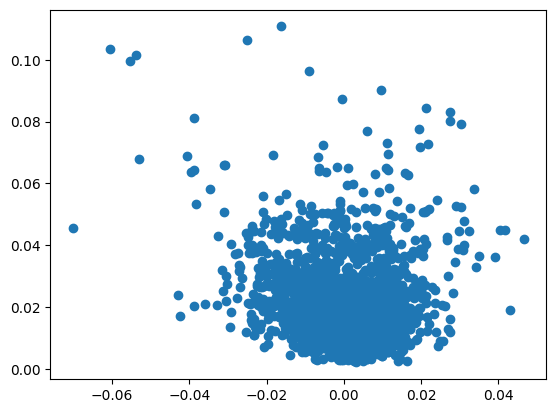

In [27]:
# plot

plt.scatter(stock['Rets Mean'], stock['Rets STD']); # plot X and y

In [28]:
# get array X in order to perform clustering

X1 = stock['Rets Mean']
X1

Date
2014-11-07   -0.002568
2014-11-10   -0.000787
2014-11-11    0.000296
2014-11-12    0.003568
2014-11-13    0.001976
                ...   
2023-12-22    0.007300
2023-12-26    0.010378
2023-12-27    0.004021
2023-12-28    0.011910
2023-12-29    0.000229
Name: Rets Mean, Length: 2301, dtype: float64

In [29]:
type(X1)

pandas.core.series.Series

In [30]:
X2 = stock['Rets STD']
X2

Date
2014-11-07    0.007389
2014-11-10    0.009050
2014-11-11    0.008597
2014-11-12    0.004400
2014-11-13    0.004297
                ...   
2023-12-22    0.031300
2023-12-26    0.031063
2023-12-27    0.026239
2023-12-28    0.009934
2023-12-29    0.019845
Name: Rets STD, Length: 2301, dtype: float64

In [31]:
type(X2)

pandas.core.series.Series

In [32]:
X1 = stock['Rets Mean'].values
X1

array([-0.00256795, -0.00078664,  0.00029593, ...,  0.00402098,
        0.01191032,  0.00022926])

In [33]:
X2 = stock['Rets STD'].values
X2

array([0.00738874, 0.00904956, 0.00859655, ..., 0.02623858, 0.00993353,
       0.0198447 ])

In [34]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [35]:
X = np.array(list(zip(X1, X2)))
X

array([[-0.00256795,  0.00738874],
       [-0.00078664,  0.00904956],
       [ 0.00029593,  0.00859655],
       ...,
       [ 0.00402098,  0.02623858],
       [ 0.01191032,  0.00993353],
       [ 0.00022926,  0.0198447 ]])

In [36]:
type(X)

numpy.ndarray

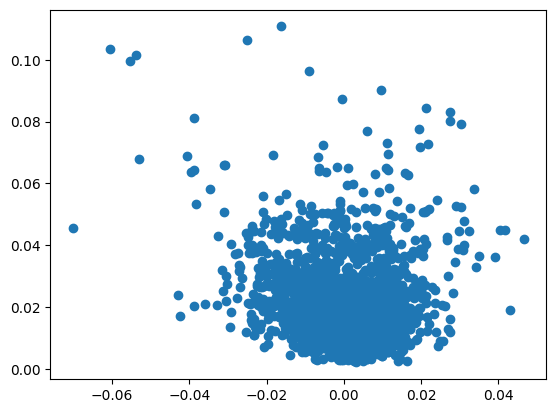

In [37]:
# plot 

plt.scatter(X[:, 0], X[:, 1]); # not need to use stock dataframe

In [38]:
# feature X are not bad but require normalization for kmean - better

def normalizedFeature(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)

    return x


In [39]:
# call a function and keep data in X_norm
X_norm = normalizedFeature(X)
X_norm

array([[-0.2833751 , -0.91855465],
       [-0.11706983, -0.79513121],
       [-0.01600003, -0.82879638],
       ...,
       [ 0.33177472,  0.48226442],
       [ 1.06833357, -0.72943962],
       [-0.02222447,  0.00710579]])

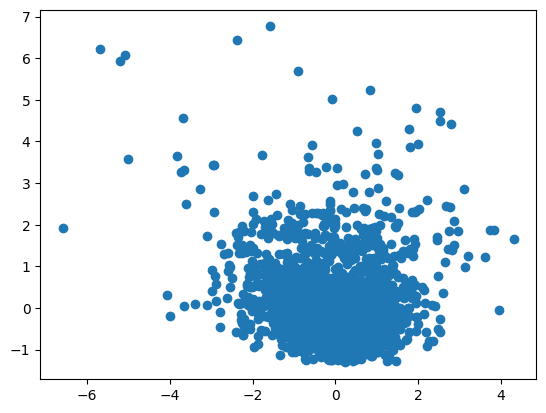

In [40]:
# plot 

plt.scatter(X_norm[:, 0], X_norm[:, 1]);

In [41]:
# start KMean Clustering

# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

In [42]:
def plotCluster(data, C, K, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i]) # find data for each cluster
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i]) # plot
        plt.annotate(i, (C[i, 0], C[i, 1]), size = 20)
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('Variable #1')
    plt.ylabel('Variable #2')
    plt.title('Cluster')

In [43]:
def kmeanClustering(data, K):

    # step 1. random centroids
    C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
    C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)

    # set Centroid to variable C
    C = np.zeros((K, 2))
    C_old = np.zeros(C.shape)

    C[:, 0] = C_x 
    C[:, 1] = C_y 

    # Step 2. label data
    cluster_label = np.zeros((len(data), 1))

    for i in range(len(data)): # run 150 rounds - depands on length of data
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance) # for the shortest distance
        cluster_label[i] = cluster

    # Step 3. calculate new centroids
    C_old = C.copy()

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

    # Calculate error
    error = distance_fn(C, C_old, None)
    
    # Plot
    plotCluster(data, C, K, cluster_label)

    # Check if error is ok to stop
    while error != 0: # will stop when error = 0
    
        cluster_label = np.zeros((len(data), 1))
    
        for i in range(len(data)):
            distance = distance_fn(data[i, :], C)
            cluster = np.argmin(distance)
            cluster_label[i] = cluster
    
        C_old = C.copy()
    
        for i in range(K):
            points = []
            points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
            C[i] = np.mean(points, axis=0)
        
        plotCluster(data, C, K, cluster_label.copy())
    
        error = distance_fn(C, C_old, None)
        print(error)

    return cluster_label

2.0211804255603942
1.0498996150324742
1.0749440078353814
0.6790804600782304
0.6614125351010376
0.5251481500329107
0.31989575571700696
0.19466435677086064
0.24394109296282251
0.10759838450140653
0.10815708678451517
0.10158818387867008
0.06832285266544767
0.06795775589833106
0.054388024293886415
0.03531967572768085
0.039006948655592955
0.013813751438230406
0.011061934398999633
0.01390415668996467


/var/folders/0z/2gy2pkss67v3rwygb64_tfvm0000gn/T/ipykernel_25177/3225941393.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (8, 6))


0.020726801833647487
0.019594728927799666
0.009707249534232852
0.0023816949114789454
0.0


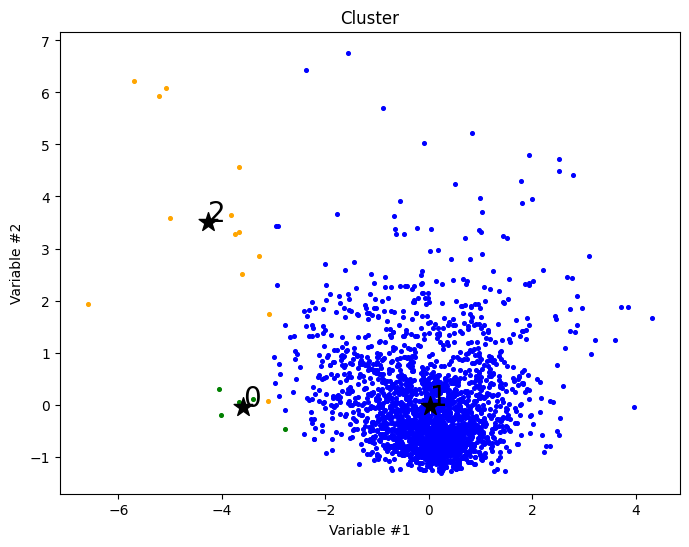

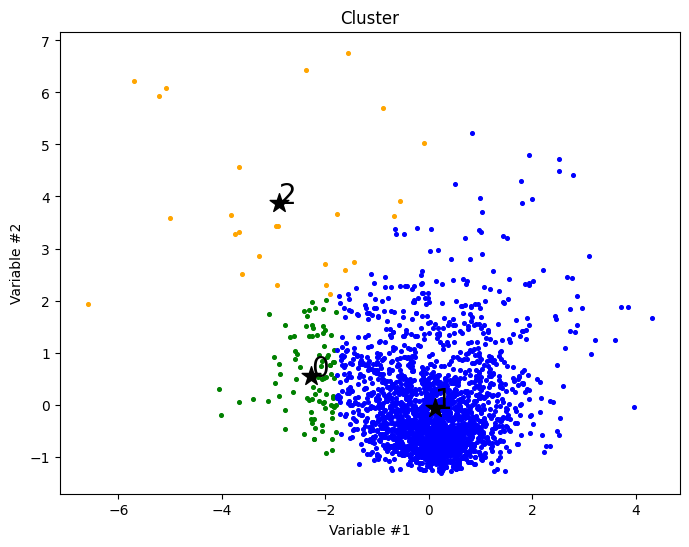

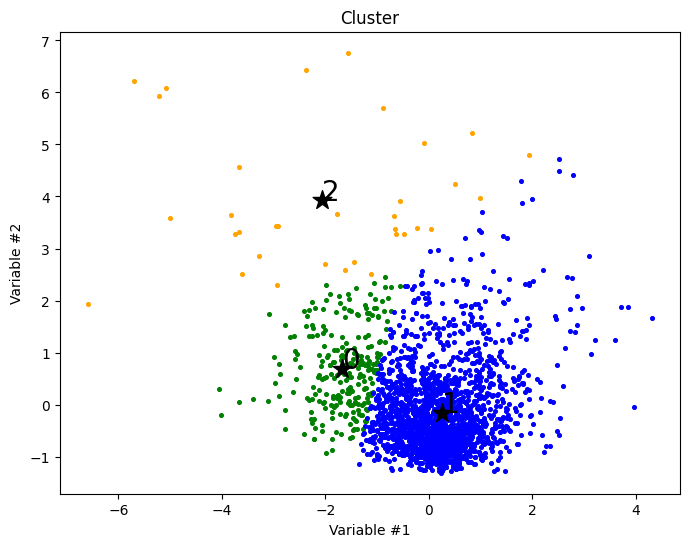

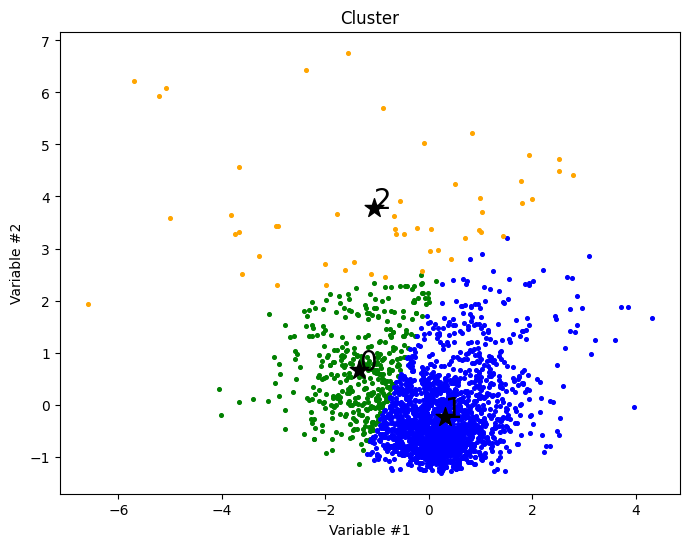

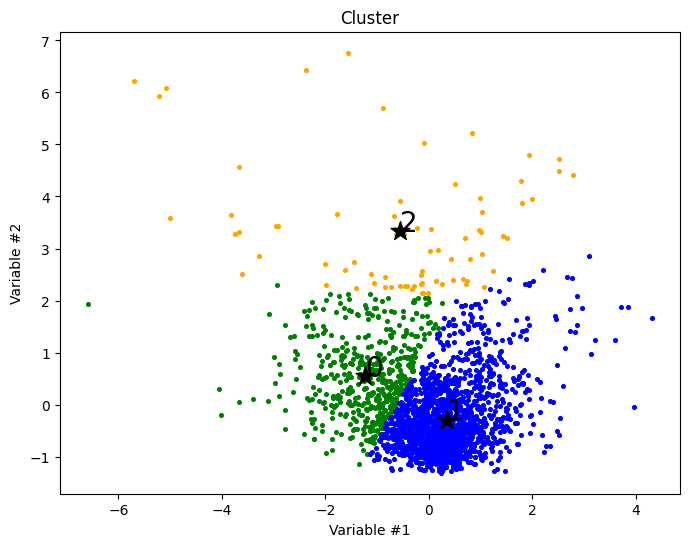

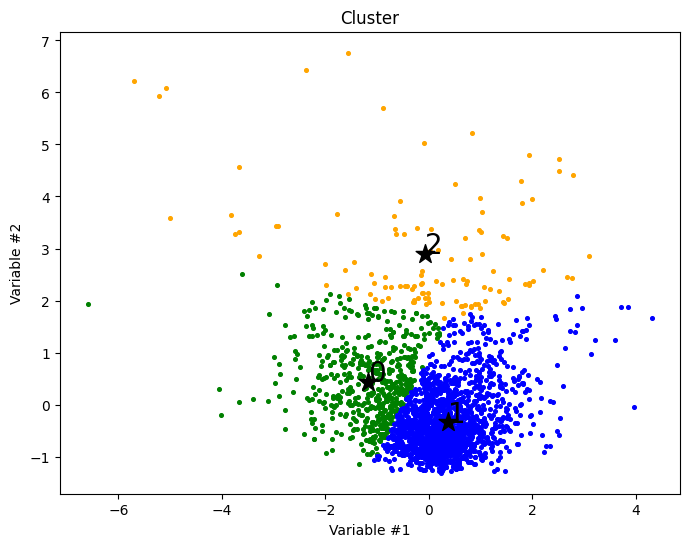

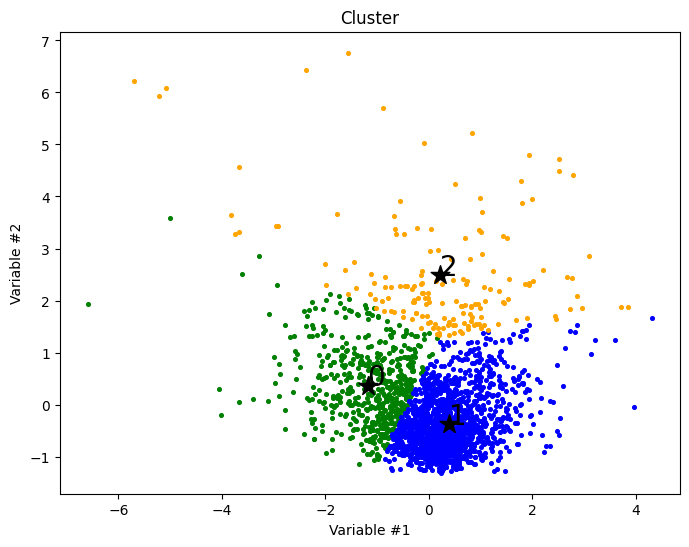

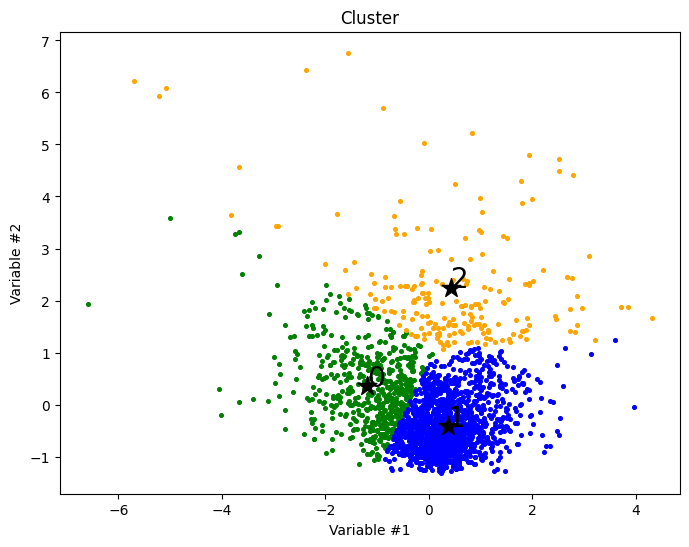

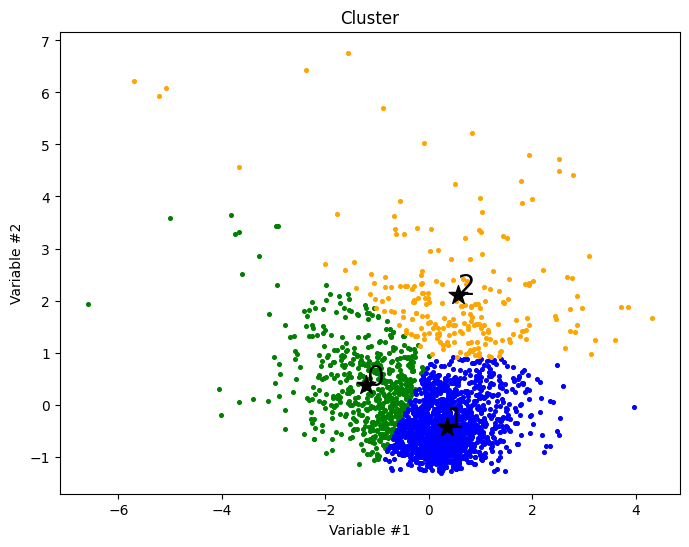

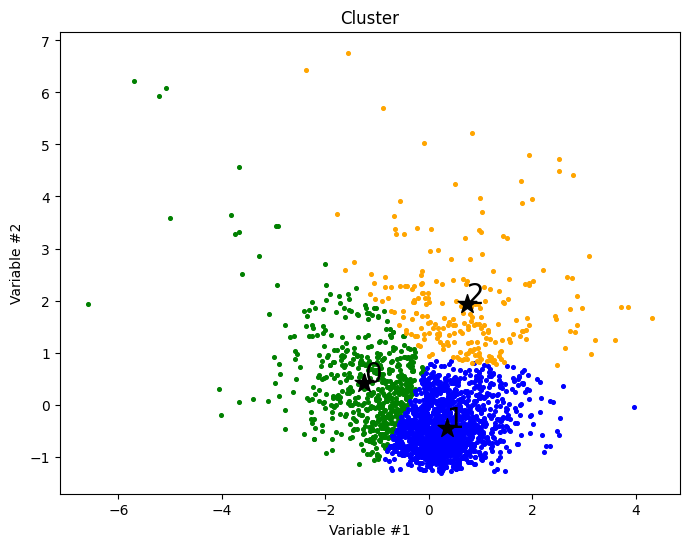

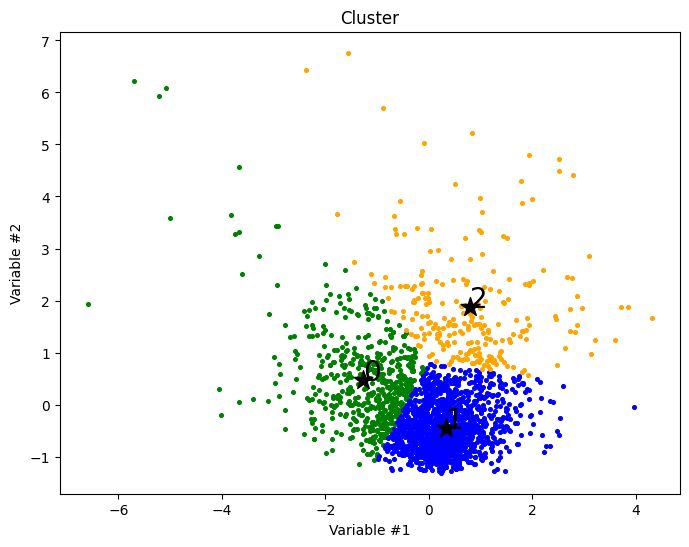

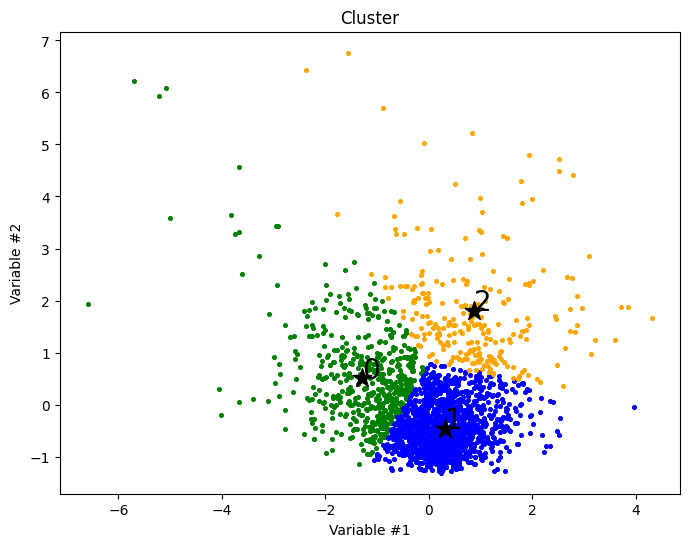

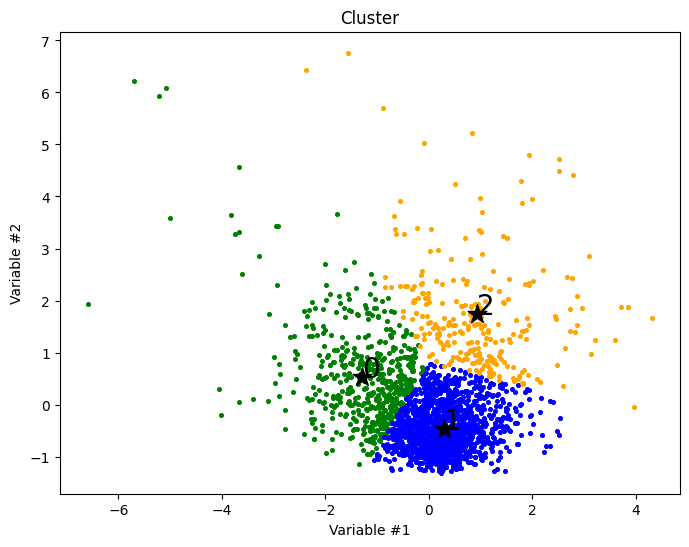

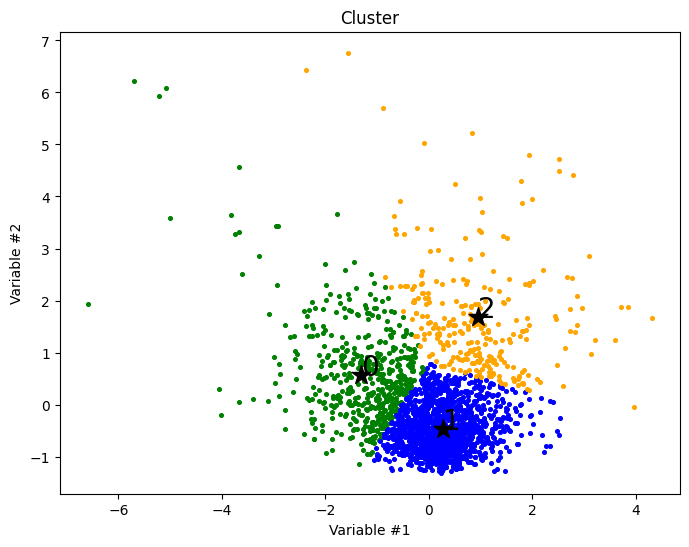

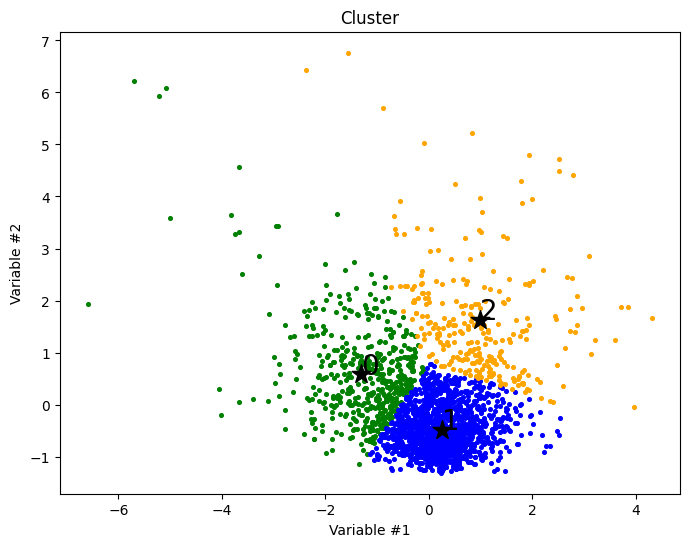

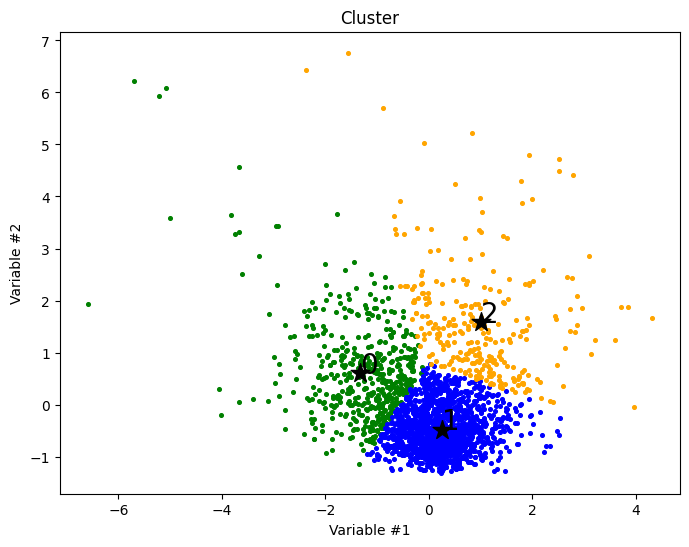

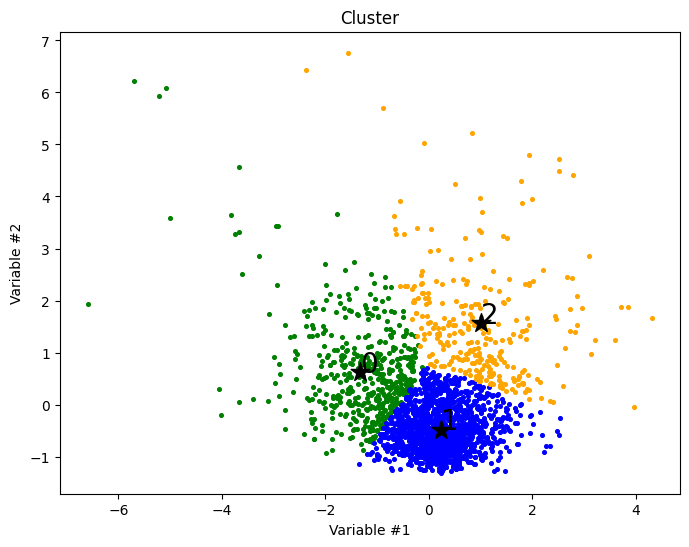

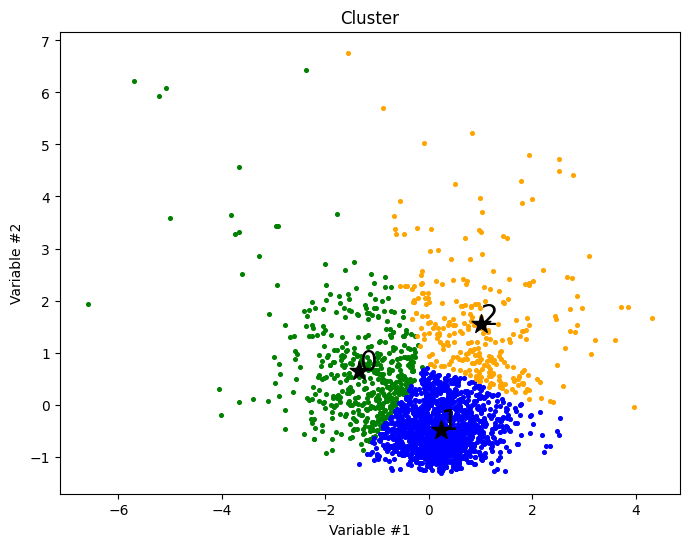

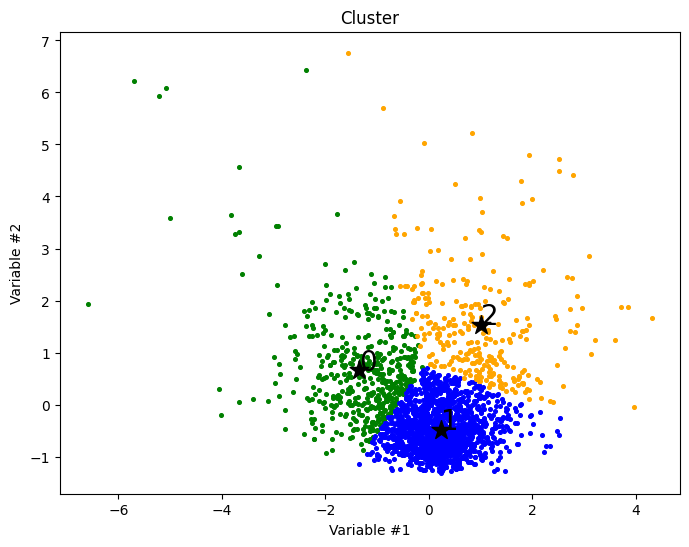

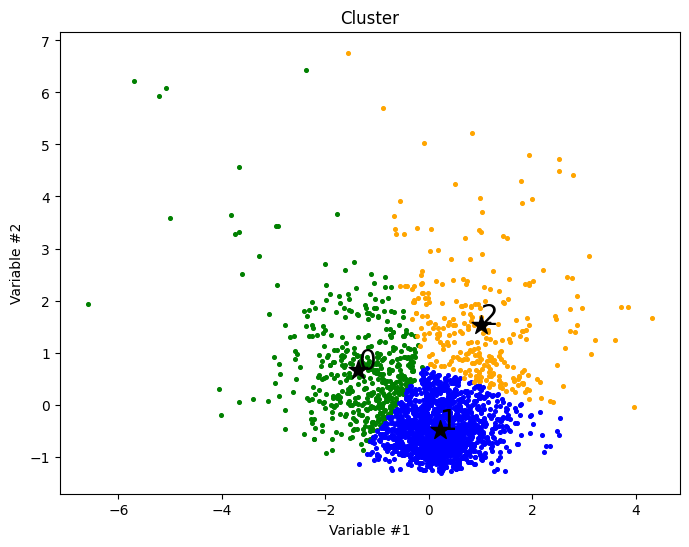

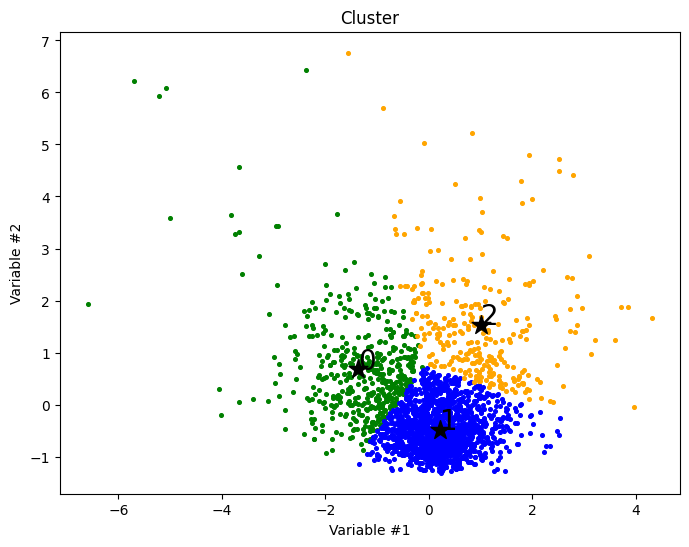

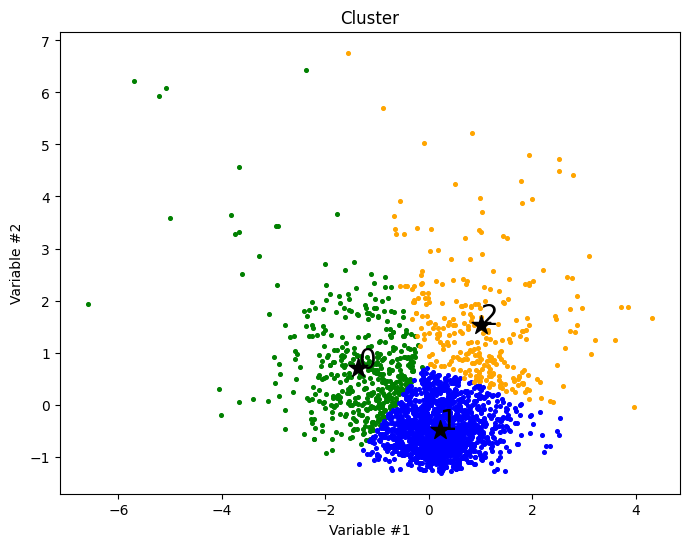

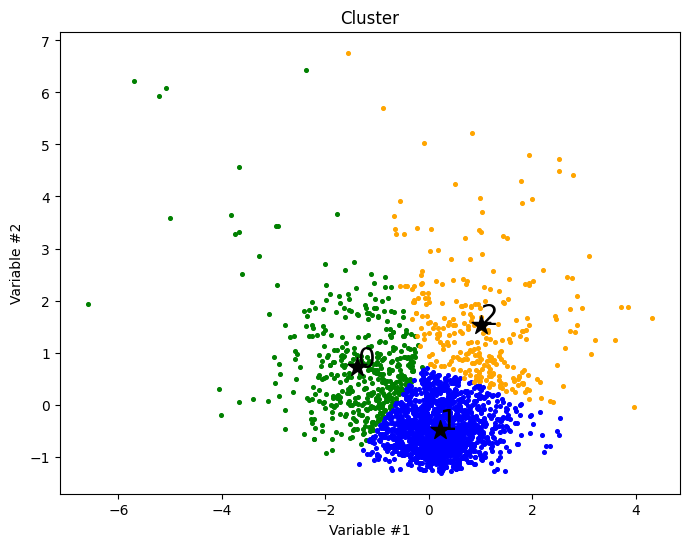

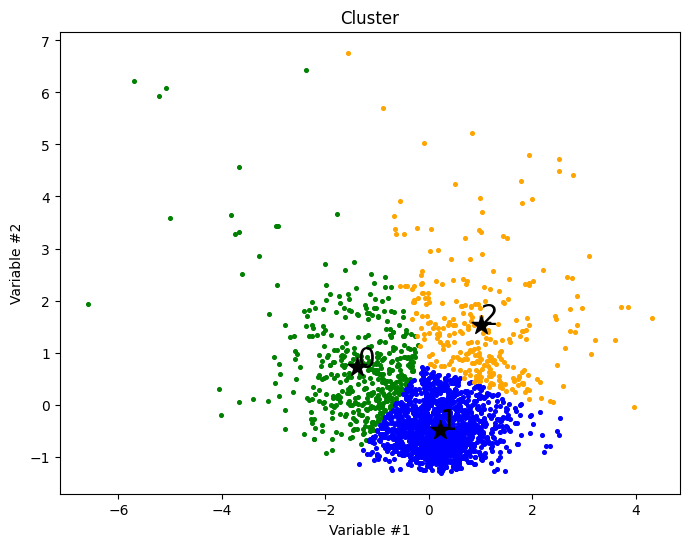

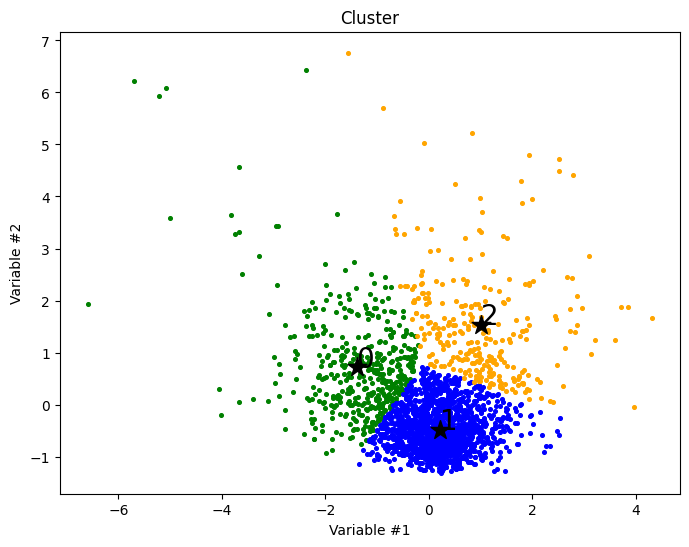

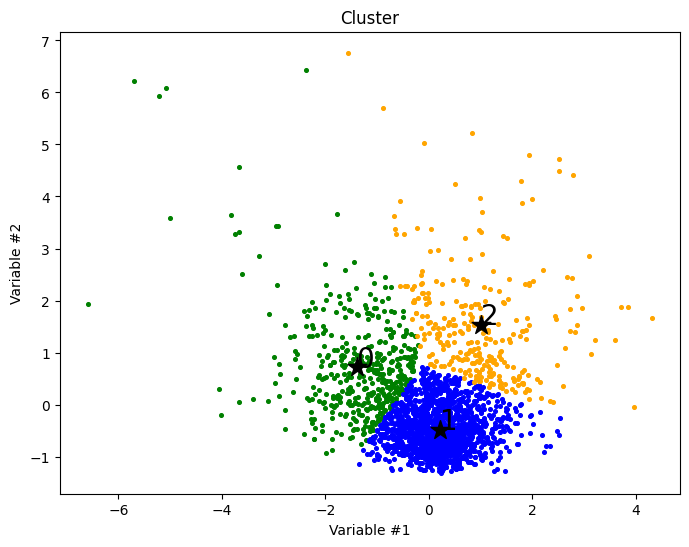

In [44]:
# call a function
K = 3
label_kmean = kmeanClustering(X_norm, K)

In [45]:
label_kmean

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

### Use label from KMean

In [46]:
stock['Class'] = label_kmean 
stock.head(10)

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2014-11-07,20.150000,20.150000,20.080000,20.120001,18.156876,1500,-0.000994,-0.002568,0.007389,1.0
2014-11-10,20.160000,20.299999,20.160000,20.299999,18.319313,3900,0.008907,-0.000787,0.009050,1.0
2014-11-11,20.690001,20.690001,20.233999,20.290001,18.310291,2900,-0.000493,0.000296,0.008597,1.0
2014-11-12,20.260000,20.360001,20.240000,20.360001,18.373459,2300,0.003444,0.003568,0.004400,1.0
2014-11-13,20.400000,20.420000,20.299999,20.340000,18.355412,11900,-0.000983,0.001976,0.004297,1.0
2014-11-14,20.420000,20.440001,20.420000,20.440001,18.445656,1300,0.004904,0.003156,0.004082,1.0
2014-11-17,20.590000,20.590000,20.360001,20.410000,18.418579,3400,-0.001469,0.001081,0.002891,1.0
2014-11-18,20.600000,20.600000,20.600000,20.600000,18.590046,1000,0.009266,0.003033,0.004442,1.0
2014-11-19,20.290001,20.290001,20.290001,20.290001,18.310291,1100,-0.015163,-0.000689,0.009228,1.0


In [47]:
# idea to trade

idx_c0 = np.where(stock['Class'] == 0) # find index in class 0
idx_c0

(array([ 118,  119,  120,  196,  197,  198,  199,  200,  207,  292,  293,
         294,  295,  296,  297,  298,  299,  300,  301,  302,  312,  313,
         314,  315,  316,  317,  372,  373,  374,  410,  411,  412,  413,
         484,  485,  486,  487,  488,  520,  521,  654,  665,  815,  816,
         817,  818,  819,  848,  850,  851,  852,  853,  854,  912,  913,
         914,  915,  916,  935,  936,  937,  938,  939,  983,  984,  985,
         986,  987,  988,  989,  990,  994,  997,  998, 1000, 1010, 1011,
        1012, 1013, 1015, 1016, 1017, 1018, 1019, 1026, 1027, 1028, 1029,
        1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1057, 1060, 1101,
        1102, 1132, 1133, 1134, 1135, 1136, 1137, 1140, 1141, 1142, 1188,
        1190, 1191, 1192, 1193, 1194, 1195, 1198, 1199, 1207, 1208, 1226,
        1330, 1331, 1332, 1333, 1334, 1335, 1336, 1339, 1340, 1341, 1342,
        1343, 1344, 1345, 1346, 1347, 1349, 1357, 1358, 1359, 1379, 1381,
        1406, 1407, 1418, 1419, 1436, 

In [48]:
len(idx_c0)

1

In [49]:
len(idx_c0[0])

442

In [50]:
idx_c1 = np.where(stock['Class'] == 1)
idx_c1

(array([   0,    1,    2, ..., 2298, 2299, 2300]),)

In [51]:
len(idx_c1[0])

1575

In [52]:
idx_c2 = np.where(stock['Class'] == 2)
idx_c2

(array([ 319,  320,  991,  992,  993,  999, 1001, 1002, 1003, 1004, 1005,
        1006, 1007, 1025, 1041, 1042, 1043, 1045, 1046, 1047, 1048, 1049,
        1317, 1318, 1319, 1320, 1337, 1348, 1350, 1351, 1352, 1353, 1354,
        1355, 1356, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368,
        1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1380,
        1382, 1386, 1389, 1408, 1409, 1410, 1415, 1416, 1417, 1452, 1465,
        1471, 1472, 1474, 1475, 1488, 1489, 1508, 1509, 1511, 1512, 1513,
        1533, 1534, 1551, 1552, 1553, 1554, 1555, 1568, 1593, 1594, 1595,
        1596, 1597, 1598, 1608, 1609, 1610, 1612, 1640, 1642, 1643, 1783,
        1784, 1785, 1786, 1790, 1791, 1792, 1793, 1794, 1819, 1820, 1821,
        1822, 1823, 1826, 1827, 1830, 1837, 1838, 1839, 1840, 1850, 1851,
        1852, 1853, 1854, 1855, 1856, 1858, 1859, 1860, 1861, 1862, 1863,
        1873, 1884, 1885, 1886, 1891, 1892, 1893, 1894, 1895, 1896, 1897,
        1899, 1900, 1901, 1902, 1903, 

In [53]:
len(idx_c2[0])

284

In [54]:
len(stock), len(idx_c0[0]) + len(idx_c1[0]) + len(idx_c2[0])

(2301, 2301)

In [55]:
# if we would like to trade only some class

profit_c0 = stock['Log Rets']
profit_c0

Date
2014-11-07   -0.000994
2014-11-10    0.008907
2014-11-11   -0.000493
2014-11-12    0.003444
2014-11-13   -0.000983
                ...   
2023-12-22    0.013293
2023-12-26    0.014607
2023-12-27    0.008700
2023-12-28   -0.002214
2023-12-29   -0.033239
Name: Log Rets, Length: 2301, dtype: float64

In [56]:
type(profit_c0)

pandas.core.series.Series

In [57]:
profit_c0 = np.array(profit_c0).reshape(-1, 1)
profit_c0

array([[-0.00099358],
       [ 0.00890655],
       [-0.00049259],
       ...,
       [ 0.00869968],
       [-0.002214  ],
       [-0.03323939]])

In [58]:
profit_c0[idx_c1, 0] = 0
profit_c0[idx_c2, 0] = 0
profit_c0

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

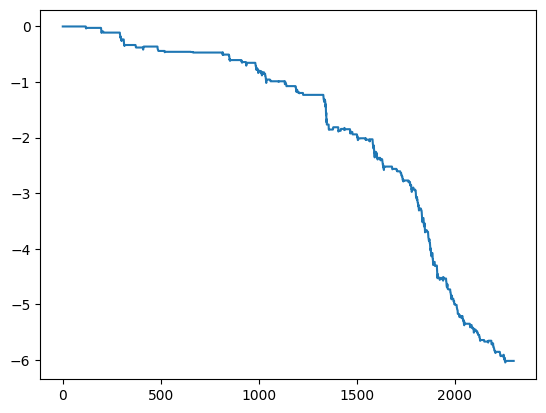

In [59]:
plt.plot(profit_c0.cumsum())

In [60]:
profit_c1 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c1

array([[-0.00099358],
       [ 0.00890655],
       [-0.00049259],
       ...,
       [ 0.00869968],
       [-0.002214  ],
       [-0.03323939]])

In [61]:
profit_c1[idx_c0, 0] = 0
profit_c1[idx_c2, 0] = 0
profit_c1

array([[-0.00099358],
       [ 0.00890655],
       [-0.00049259],
       ...,
       [ 0.00869968],
       [-0.002214  ],
       [-0.03323939]])

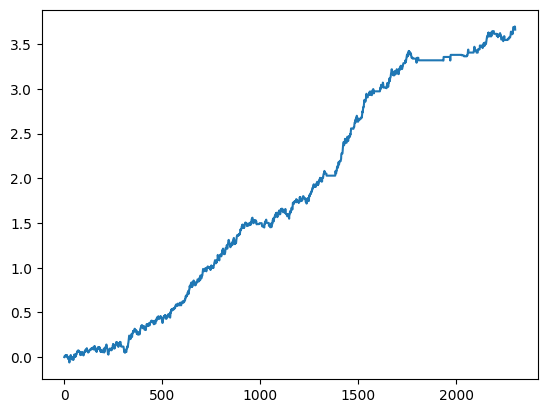

In [62]:
plt.plot(profit_c1.cumsum())

In [63]:
profit_c2 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c2

array([[-0.00099358],
       [ 0.00890655],
       [-0.00049259],
       ...,
       [ 0.00869968],
       [-0.002214  ],
       [-0.03323939]])

In [64]:
profit_c2[idx_c0, 0] = 0
profit_c2[idx_c1, 0] = 0
profit_c2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

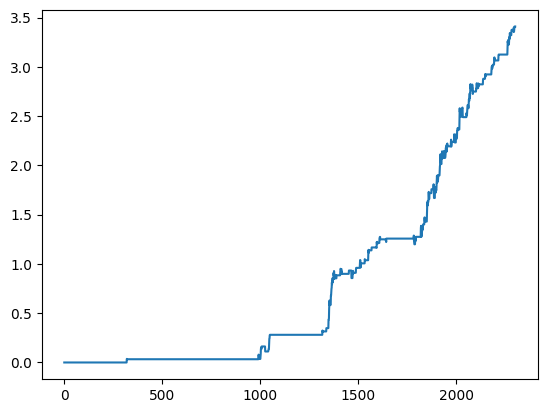

In [65]:
plt.plot(profit_c2.cumsum())

*** Require to select the correct class and time before trade
- What we require to do more
    - Lock ahead bias
    - In sample & Out sample

In [66]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD,Class
Date,,,,,,,,,,
2014-11-07,20.150000,20.150000,20.080000,20.120001,18.156876,1500,-0.000994,-0.002568,0.007389,1.0
2014-11-10,20.160000,20.299999,20.160000,20.299999,18.319313,3900,0.008907,-0.000787,0.009050,1.0
2014-11-11,20.690001,20.690001,20.233999,20.290001,18.310291,2900,-0.000493,0.000296,0.008597,1.0
2014-11-12,20.260000,20.360001,20.240000,20.360001,18.373459,2300,0.003444,0.003568,0.004400,1.0
2014-11-13,20.400000,20.420000,20.299999,20.340000,18.355412,11900,-0.000983,0.001976,0.004297,1.0
